<a href="https://colab.research.google.com/github/shruti06-ux/pytorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WORK FLOW
1. import important libraries
2. Get data ready (turn into tensors)
3. Build A Linear Regression model
4. pick a loss function and optimizer
5. build a training loop
6. Evaluate your model
7. test model with a new data point
8. save the model



# **1.import important libraries**

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# **2.Get data ready (turn into tensors)**

In [2]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                   [9.779],[6.182],[7.59],[2.167],[7.042],
                   [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.79],[2.09],[3.19],[1.69],[1.573],
                   [3.366],[2.596],[2.53],[1.221],[2.827],
                   [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)
x_train,y_train

(array([[ 3.3  ],
        [ 4.4  ],
        [ 5.5  ],
        [ 6.71 ],
        [ 6.93 ],
        [ 4.168],
        [ 9.779],
        [ 6.182],
        [ 7.59 ],
        [ 2.167],
        [ 7.042],
        [10.791],
        [ 5.313],
        [ 7.997],
        [ 3.1  ]], dtype=float32),
 array([[1.7  ],
        [2.79 ],
        [2.09 ],
        [3.19 ],
        [1.69 ],
        [1.573],
        [3.366],
        [2.596],
        [2.53 ],
        [1.221],
        [2.827],
        [3.465],
        [1.65 ],
        [2.904],
        [1.3  ]], dtype=float32))

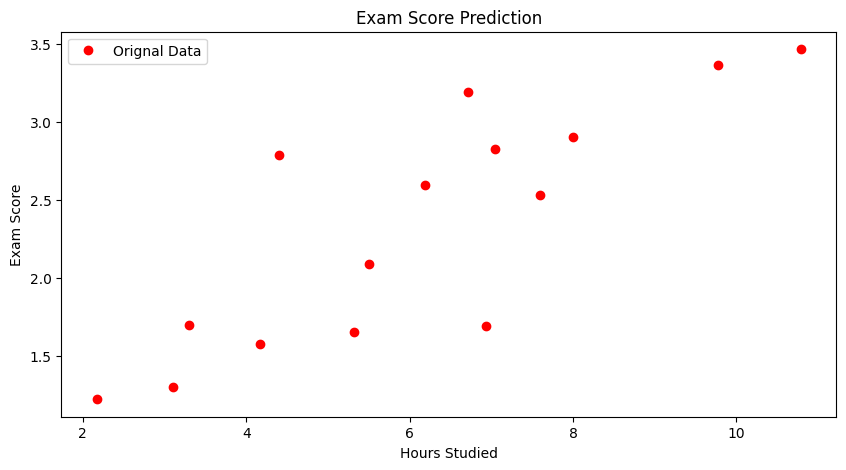

In [3]:
fig = plt.figure(figsize=(10,5))
plt.plot(x_train,y_train,'ro',label='Orignal Data')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

x_train we will train our model, we will test our model with new data point , 8 hours,

In [4]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train , y_train

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 3.1000]]),
 tensor([[1.7000],
         [2.7900],
         [2.0900],
         [3.1900],
         [1.6900],
         [1.5730],
         [3.3660],
         [2.5960],
         [2.5300],
         [1.2210],
         [2.8270],
         [3.4650],
         [1.6500],
         [2.9040],
         [1.3000]]))

# **3.Build A Linear Regression model**

In [5]:
class LinearRegression(nn.Module):   #if we write df outside class it called fun or inside class said method.
  def __init__(self):                #constructor self is object
    super().__init__()
    self.linear= nn.Linear(1,1)


  def forward(self,x):   #method wite in class
    out = self.linear(x)
    return out

In [6]:
#object of class only (object can access the class)
model = LinearRegression()

In [7]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [8]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7159]])),
             ('linear.bias', tensor([-0.4192]))])

In [9]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7159]], requires_grad=True),
 Parameter containing:
 tensor([-0.4192], requires_grad=True)]

# **4.pick a loss function and optimizer**

In [10]:
criterion= nn.MSELoss()
optimizer= torch.optim.SGD(model.parameters(),lr =1e-4)

# **5.build a training loop**

In [13]:
num_epochs = 6

In [17]:
from ast import mod
for epoch in range(num_epochs):
  model.train()
  out = model(x_train)
  loss = criterion(out, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch + 1) % 2 == 0:
    print(f'Epoch :[{epoch + 1} / {num_epochs}],loss: {loss.item():.6f}')


Epoch :[2 / 6],loss: 2.890222
Epoch :[4 / 6],loss: 2.804080
Epoch :[6 / 6],loss: 2.720875


### **6.Evaluate your model**
to see performance of our model for that we evalute it

In [18]:
model.eval()
with torch.no_grad():
  prediction = model(x_train)
prediction.data.numpy()

array([[1.7608423],
       [2.4898286],
       [3.2188146],
       [4.020699 ],
       [4.1664963],
       [2.336079 ],
       [6.05457  ],
       [3.6707861],
       [4.603888 ],
       [1.0099869],
       [4.2407203],
       [6.7252374],
       [3.094887 ],
       [4.873613 ],
       [1.6282995]], dtype=float32)

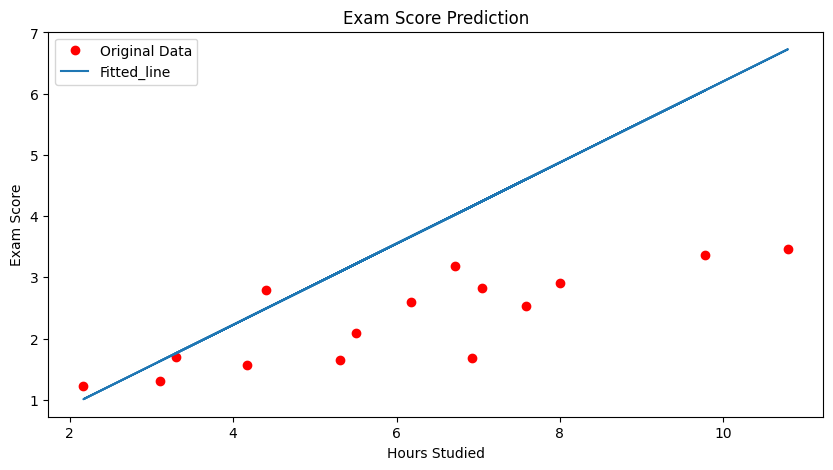

In [22]:
fig = plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original Data')
plt.plot(x_train.numpy(),prediction,label='Fitted_line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

In [23]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.6627]])),
             ('linear.bias', tensor([-0.4261]))])

# **7.Test model with a new data point**

In [24]:
new_hours_studied = 8.0
new_hours_tensor = torch.tensor([[new_hours_studied]],dtype=torch.float32)

In [26]:
model.eval()
with torch.no_grad():
  new_exam_score = model(new_hours_tensor)

print('Predicted exam score for a student who studied for 8 hours',new_exam_score.item())

Predicted exam score for a student who studied for 8 hours 4.875600814819336


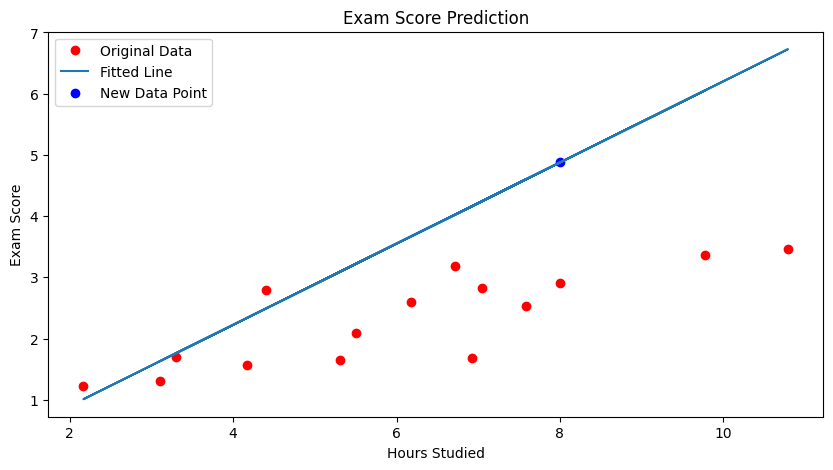

In [27]:
fig = plt.figure(figsize =(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label= 'Original Data')
plt.plot(x_train.numpy(),prediction.numpy(),label='Fitted Line')   #created a line
plt.scatter([new_hours_studied],[new_exam_score.item()],color='blue',label='New Data Point')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

# **8.save the model**

In [28]:
torch.save(model.state_dict(),'./LinearRegression.pth')